# Support Vector Machine (SVM)

## Business Understanding 

# Data Understanding

# Data Preperation 

# Modelling 

# Evaluation 

# Deployment 

# Using SVM On Dataset 
I will be using a cat and dog images dataset for SVM. I will be using Jake VanderPlas's notebook and making changes to it to fit with the dataset Im using

Standard imports:

## Motivating Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
from scipy import stats

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')

In [3]:
import os
import pandas as pd

# Specify the appropriate encoding parameter
df = pd.read_csv("cat_dog.csv", encoding='latin1')

# Display the data
print(df)

               image  labels
0      dog.11289.jpg       1
1      cat.10836.jpg       0
2       cat.7970.jpg       0
3       cat.2212.jpg       0
4       dog.2653.jpg       1
...              ...     ...
24995  dog.12201.jpg       1
24996   dog.2893.jpg       1
24997  cat.12267.jpg       0
24998   dog.4380.jpg       1
24999   cat.7962.jpg       0

[25000 rows x 2 columns]


The code generates a scatter plot with decision boundaries for two classes: 'cat' and 'dog'. The decision boundary isnt great because its a linear boundary and the there is no straight line that can seperate the cat and dog images. 

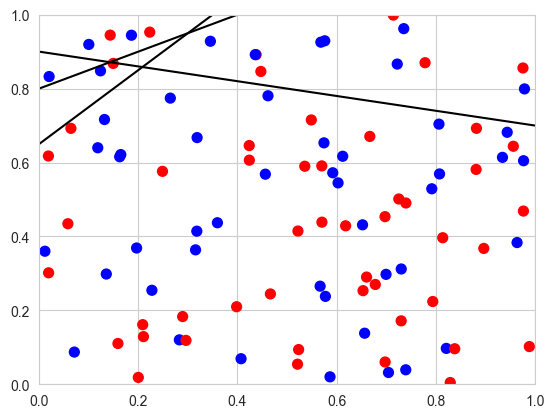

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate more data points
np.random.seed(0)
X = np.random.rand(100, 2)
y = np.random.choice(['cat', 'dog'], 100)

# Convert labels to colors
colors = {'cat': 'red', 'dog': 'blue'}
y_colors = [colors[label] for label in y]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y_colors, s=50)

# Plot the decision boundaries
xfit = np.linspace(0, 1)
for m, b in [(1, 0.65), (0.5, 0.8), (-0.2, 0.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


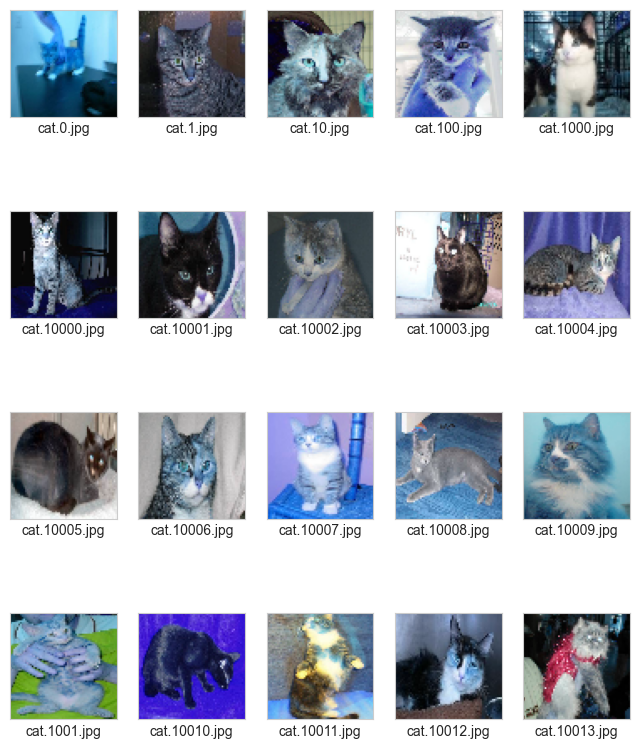

In [37]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory
current_dir = os.getcwd()

# Find the cat_dog folder in the current directory
cat_dog_folder = 'cat_dog'

# List the files in the cat_dog folder
file_list = os.listdir(cat_dog_folder)

# Create a figure and axis object
fig, ax = plt.subplots(4, 5, figsize=(8, 10))  # Changed from 3 to 4 rows

# Loop through the files in the folder
for i, axi in enumerate(ax.flat):
    # Check if the file is an image
    if file_list[i].endswith('.jpg') or file_list[i].endswith('.png'):
        # Load the image using OpenCV
        image = cv2.imread(os.path.join(cat_dog_folder, file_list[i]))
        
        # Resize the image to 64x64
        final_image = cv2.resize(image, (64, 64))

        
        
        # Plot the image
        axi.imshow(final_image)
        axi.set(xticks=[], yticks=[], xlabel=file_list[i])


In [39]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Find the cat_dog folder in the current directory
cat_dog_folder = 'cat_dog'

# List the files in the cat_dog folder
file_list = os.listdir(cat_dog_folder)

# Loop through the files in the folder
for file in file_list:
    # Check if the file is an image and contains the word "dog"
    if (file.endswith('.jpg') or file.endswith('.png')) and 'dog' in file.lower():
        print(file)


dog.0.jpg
dog.1.jpg
dog.10.jpg
dog.100.jpg
dog.1000.jpg
dog.10000.jpg
dog.10001.jpg
dog.10002.jpg
dog.10003.jpg
dog.10004.jpg
dog.10005.jpg
dog.10006.jpg
dog.10007.jpg
dog.10008.jpg
dog.10009.jpg
dog.1001.jpg
dog.10010.jpg
dog.10011.jpg
dog.10012.jpg
dog.10013.jpg
dog.10014.jpg
dog.10015.jpg
dog.10016.jpg
dog.10017.jpg
dog.10018.jpg
dog.10019.jpg
dog.1002.jpg
dog.10020.jpg
dog.10021.jpg
dog.10022.jpg
dog.10023.jpg
dog.10024.jpg
dog.10025.jpg
dog.10026.jpg
dog.10027.jpg
dog.10028.jpg
dog.10029.jpg
dog.1003.jpg
dog.10030.jpg
dog.10031.jpg
dog.10032.jpg
dog.10033.jpg
dog.10034.jpg
dog.10035.jpg
dog.10036.jpg
dog.10037.jpg
dog.10038.jpg
dog.10039.jpg
dog.1004.jpg
dog.10040.jpg
dog.10041.jpg
dog.10042.jpg
dog.10043.jpg
dog.10044.jpg
dog.10045.jpg
dog.10046.jpg
dog.10047.jpg
dog.10048.jpg
dog.10049.jpg
dog.1005.jpg
dog.10050.jpg
dog.10051.jpg
dog.10052.jpg
dog.10053.jpg
dog.10054.jpg
dog.10055.jpg
dog.10056.jpg
dog.10057.jpg
dog.10058.jpg
dog.10059.jpg
dog.1006.jpg
dog.10060.jpg
dog.10061.jp

In [41]:
import os
import shutil
import random

# Define the source and destination folders
source_folder = 'cat_dog'
destination_folder = 'cat_dog_set'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# List the files in the source folder
file_list = os.listdir(source_folder)

# Shuffle the file list
random.shuffle(file_list)

# Counters for cats and dogs
cat_count = 0
dog_count = 0

# Loop through the files in the source folder
for file in file_list:
    # Check if the file is an image
    if file.endswith('.jpg') or file.endswith('.png'):
        # Check if the file contains 'cat' or 'dog'
        if 'cat' in file and cat_count < 250:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            cat_count += 1
        elif 'dog' in file and dog_count < 250:
            # Copy the file to the destination folder
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, file))
            dog_count += 1

    # Check if we have reached the desired number of cats and dogs
    if cat_count >= 250 and dog_count >= 250:
        break

print(f'Copied {cat_count} cat images and {dog_count} dog images to {destination_folder}')


Copied 250 cat images and 250 dog images to cat_dog_set
